Sections:


1. <a href="#sec1"> Imports </a>
2. <a href="#sec2"> Load data </a>
3. <a href="#sec3"> Visualizing image data </a>
    * <a href="#sec30"> data reshaping </a>
    * <a href="#sec31"> visualization </a>
4. <a href="#sec4"> Pre-processing </a>
    * <a href="#sec41"> labels </a>
    * <a href="#sec42"> data normalization </a>
    * <a href="#sec43"> data split </a>
5. <a href="#sec5"> Define and train model </a>
6. <a href="#sec6"> Evaluate model </a>
7. <a href="#sec7"> Predict on test data </a>
    * <a href="#sec71"> generate submission </a>
8. <a href="#sec8"> Potential next steps </a>


<a id="sec1"></a>
## 1. Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

<a id="sec2"></a>
## 2. Load data

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
df_train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
df_test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

print(df_train.shape)
print(df_test.shape)

(42000, 785)
(28000, 784)


In [4]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
x_train_temp = np.array(df_train.iloc[:, 1:])
y_train = np.array(df_train.iloc[:, 0])

x_test = np.array(df_test)

<a id="sec3"></a>
## 3. Visualizing image data

<a id="sec30"></a>
### data reshaping

In [7]:
N_train_samples = x_train_temp.shape[0]
x_train = x_train_temp.reshape(N_train_samples, 28, 28, 1)

<a id="sec31"></a>
### visualization

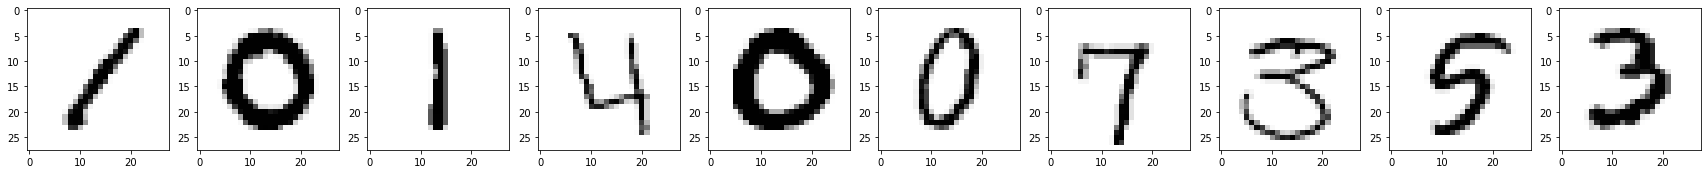

In [8]:
plt.figure(figsize=(30, 15))

n = 10

for i in range(n):
    plt.subplot(1, n, i+1)
    img = x_train[i]
    plt.imshow(img, cmap='Greys')
plt.show()

<a id="sec4"></a>
## 4. Pre-processing

<a id="sec41"></a>
### labels

In [9]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

In [10]:
y_cat_train = to_categorical(y_train)
y_cat_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

<a id="sec42"></a>
### data normalization

In [11]:
x_train = x_train/255

<a id="sec43"></a>
### data split

In [12]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_cat_train, test_size=0.2, random_state=42)

<a id="sec5"></a>
## 5. Define and train model

In [13]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 599,402
Trainable params: 599,402
Non-trainable params: 0
__________________________________________________

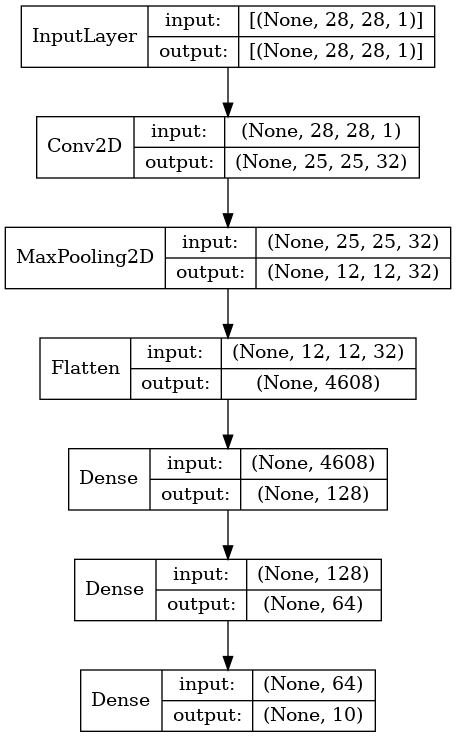

In [15]:
plot_model(model, show_shapes=True, show_layer_names=False)

In [16]:
early_stop = EarlyStopping(monitor='val_loss',
                           patience=5)

In [17]:
# TRAIN MODEL

model.fit(X_train,
          Y_train, 
          epochs=30, 
          validation_data=(X_val, Y_val),
          callbacks=[early_stop])

Epoch 1/30
1050/1050 [==============================] - 14s 13ms/step - loss: 0.4058 - accuracy: 0.8723 - val_loss: 0.0788 - val_accuracy: 0.9752
Epoch 2/30
1050/1050 [==============================] - 12s 12ms/step - loss: 0.0592 - accuracy: 0.9807 - val_loss: 0.0567 - val_accuracy: 0.9808
Epoch 3/30
1050/1050 [==============================] - 12s 12ms/step - loss: 0.0339 - accuracy: 0.9884 - val_loss: 0.0536 - val_accuracy: 0.9823
Epoch 4/30
1050/1050 [==============================] - 12s 12ms/step - loss: 0.0255 - accuracy: 0.9914 - val_loss: 0.0526 - val_accuracy: 0.9829
Epoch 5/30
1050/1050 [==============================] - 12s 12ms/step - loss: 0.0193 - accuracy: 0.9936 - val_loss: 0.0530 - val_accuracy: 0.9839
Epoch 6/30
1050/1050 [==============================] - 12s 12ms/step - loss: 0.0123 - accuracy: 0.9960 - val_loss: 0.0498 - val_accuracy: 0.9862
Epoch 7/30
1050/1050 [==============================] - 12s 12ms/step - loss: 0.0120 - accuracy: 0.9962 - val_loss: 0.0572 -

<a id="sec6"></a>
## 6. Evaluate model

In [18]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.197094,0.939018,0.078803,0.975238
1,0.059559,0.981161,0.056720,0.980833
2,0.038439,0.987500,0.053610,0.982262
3,0.026299,0.991518,0.052638,0.982857
4,0.021257,0.993304,0.052972,0.983929
5,0.014410,0.995179,0.049795,0.986190
6,0.012650,0.995923,0.057169,0.984167
7,0.010944,0.996190,0.059163,0.985000
8,0.008403,0.997173,0.071843,0.983571
9,0.009211,0.996964,0.052806,0.987857


<AxesSubplot:>

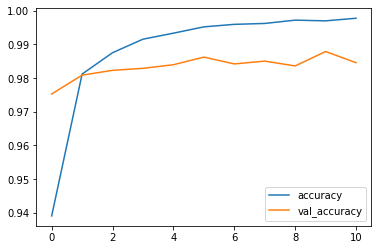

In [19]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

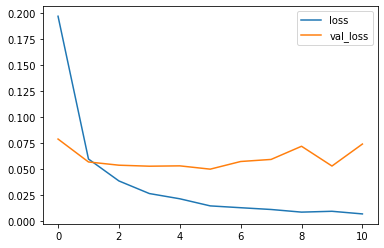

In [20]:
losses[['loss','val_loss']].plot()

In [21]:
pred_val = np.argmax(model.predict(X_val), axis=1)
real_val = np.argmax(Y_val, axis=1)

In [22]:
print(classification_report(real_val, pred_val))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.99      0.99      0.99       909
           2       0.98      0.98      0.98       846
           3       0.99      0.98      0.98       937
           4       0.98      0.98      0.98       839
           5       0.99      0.98      0.98       702
           6       0.99      0.99      0.99       785
           7       0.99      0.98      0.99       893
           8       0.98      0.98      0.98       835
           9       0.96      0.99      0.98       838

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



In [23]:
confusion_matrix(real_val, pred_val)

array([[811,   0,   0,   0,   1,   0,   1,   0,   1,   2],
       [  0, 904,   3,   0,   0,   0,   0,   0,   2,   0],
       [  1,   4, 833,   0,   5,   0,   0,   0,   2,   1],
       [  1,   0,   3, 916,   0,   3,   0,   3,   5,   6],
       [  1,   3,   0,   0, 821,   1,   4,   0,   0,   9],
       [  1,   0,   0,   4,   1, 685,   6,   0,   2,   3],
       [  2,   3,   0,   0,   0,   1, 775,   0,   4,   0],
       [  0,   0,   6,   0,   3,   0,   0, 877,   2,   5],
       [  1,   0,   3,   2,   1,   2,   0,   2, 818,   6],
       [  1,   0,   0,   2,   3,   1,   0,   0,   1, 830]])

<a id="sec7"></a>
## 7. Predict on test data

In [24]:
N_test_samples = x_test.shape[0]

x_test_new = x_test.reshape(N_test_samples, 28, 28, 1)
x_test_new = x_test_new/255

x_test_new.shape

(28000, 28, 28, 1)

In [25]:
predictions = model.predict(x_test_new)

print(predictions.shape)

predictions

(28000, 10)


array([[6.69903044e-14, 3.46782268e-14, 1.00000000e+00, ...,
        1.27913177e-15, 5.12586986e-15, 2.61817799e-15],
       [1.00000000e+00, 6.11868345e-17, 5.47624392e-13, ...,
        4.31443591e-13, 4.09818013e-12, 6.32739304e-12],
       [1.69757430e-17, 1.80309157e-14, 2.55816446e-13, ...,
        9.86240061e-13, 3.63563207e-11, 9.99999881e-01],
       ...,
       [4.42398901e-22, 2.04316258e-18, 1.93152960e-18, ...,
        2.36803812e-20, 2.22601466e-15, 1.52218523e-15],
       [1.19298763e-13, 5.80044503e-14, 3.26842481e-12, ...,
        1.07631563e-10, 1.42550305e-10, 9.99999523e-01],
       [6.16058603e-16, 2.67955061e-15, 1.00000000e+00, ...,
        1.59253510e-17, 1.43702717e-13, 1.10239556e-13]], dtype=float32)

In [26]:
final_pred = np.argmax(predictions, axis=1)

final_pred

array([2, 0, 9, ..., 3, 9, 2])

Predicted value: 5



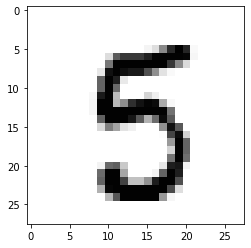

In [27]:
# Visualize some test prediction and corresponding digit 

test_index = 10

plt.imshow(x_test_new[test_index], cmap='Greys')
print(f"Predicted value: {final_pred[test_index]}\n")


<a id="sec71"></a>
### generate submission

In [28]:
pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [29]:
submission_dict = {"ImageId": [i+1 for i in range(28000)],
                   "Label": final_pred}

sub_df = pd.DataFrame(submission_dict)

sub_df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [30]:
sub_df.to_csv("submission.csv", index=False)

<a id="sec8"></a>
## 8. Potential next steps

* explore (mean? histogram? nonzero per class?)
* feature selection (crop and other methods)?
* dimensionality reduction?
* data augmentation?
* cross validation?
* more complex CNN?
* grid search?
* compare to simpler approach (cosine similarity? svm?)